In [ ]:
# DATASET INSPECTION
import os
import pandas as pd

# Define metadata path and image directories
metadata_path = r'D:\skin_disease_detection\backend\data\Ham10000\HAM10000_metadata.csv'
image_dir_1 = r'D:\skin_disease_detection\backend\data\Ham10000\HAM10000_images_part_1'
image_dir_2 = r'D:\skin_disease_detection\backend\data\Ham10000\HAM10000_images_part_2'

# Load metadata
metadata = pd.read_csv(metadata_path)

# Inspect the first few rows
print("##### Inspect The First Few Rows #####")
print(metadata.head())
print("\n")

# Check data types
data_types = metadata.dtypes
print("##### Data Types ##### \n", data_types)
print("\n")

# Check for missing values
missing_values = metadata.isnull().sum()
print("##### Missing Values In Columns ##### \n", missing_values)
print("\n")

# Check Unknown Valuses In "SEX" and "LOCALIZATION" Columns
print("##### Checking 'unknown' values in 'SEX' and 'LOCALIZATION' columns #####")
if 'unknown' in metadata['sex'].values:
    print("'unknown' exists in 'sex' column.")
else:
    print("'unknown' does not exist in 'sex' column.")

if 'unknown' in metadata['localization'].values:
    print("'unknown' exists in 'localization' column.")
else:
    print("'unknown' does not exist in 'localization' column.")

# Check for duplicate rows in metadata
print("\n")
print("##### Checking Duplicate Rows #####")
duplicate_count = metadata.duplicated().sum()
if duplicate_count > 0:
    print(f"Duplicate rows found: {duplicate_count}. Removing duplicates...")
    # metadata.drop_duplicates(inplace=True)
    # print("Duplicate rows removed.")
else:
    print("No duplicate rows found. No action taken.")

# Verify that all images listed in the metadata are present in the folders
print("\n")
print("##### Checking Missing Images In Folders #####")
image_ids = set(metadata['image_id'])
all_image_files = set(os.listdir(image_dir_1) + os.listdir(image_dir_2))
missing_images = [img_id for img_id in image_ids if f"{img_id}.jpg" not in all_image_files]
if missing_images:
    print(f"Missing images: {missing_images}")
else:
    print("All images are accounted for.")

# Check for duplicate image_id values
print("\n")
# Check for rows with age = 0.0
print("##### Checking for invalid ages (0.0) #####")
invalid_age_rows = metadata[metadata['age'] == 0.0]
print(f"Number of rows with invalid age: {len(invalid_age_rows)}")

if len(invalid_age_rows) > 0:
    print("\nRows with invalid age:")
    print(invalid_age_rows)  # Display all rows with invalid age
else:
    print("No invalid ages found.")

print("\n")

# Basic statistics of the dataset
print("\n")
print("##### Statistics of the dataset #####")
print(metadata.describe(include='all'))
print("\n")




##### Displaying Distribution of Diseases (Lesion) #####


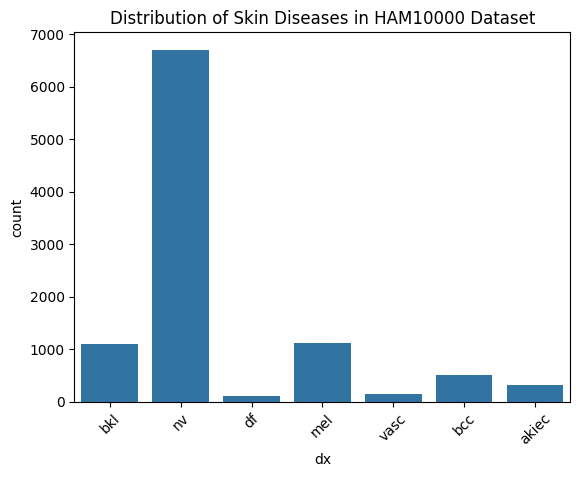

##### Displaying sample images #####


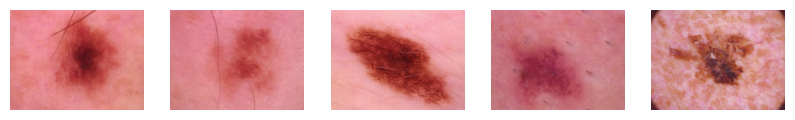

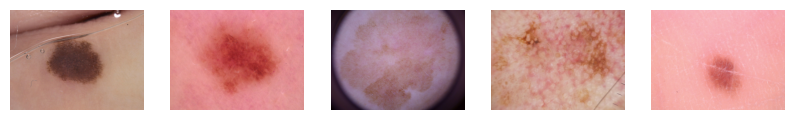

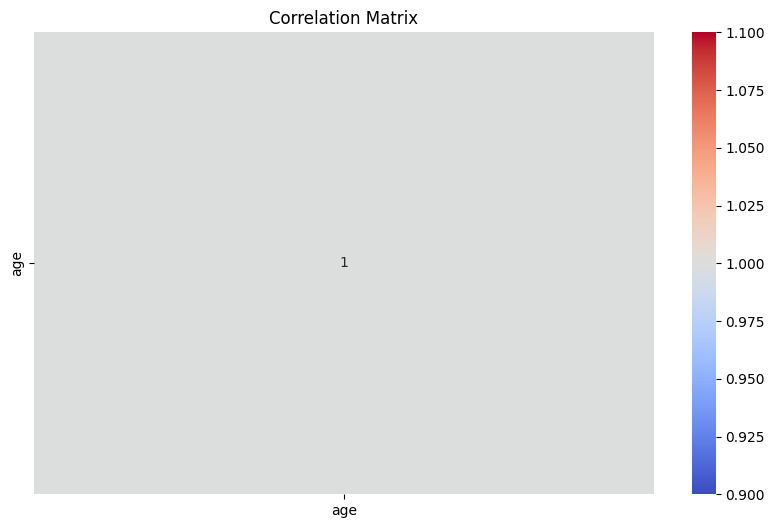

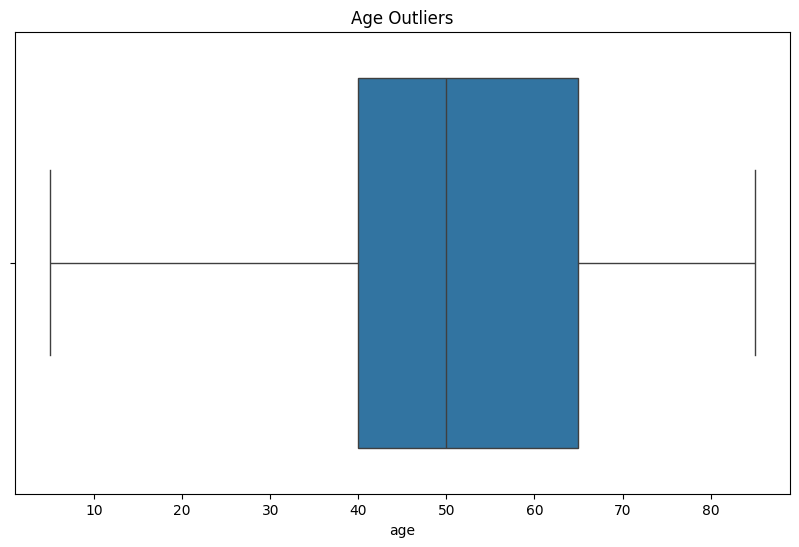

<Figure size 1000x600 with 0 Axes>

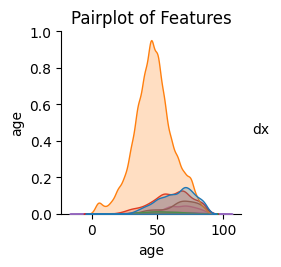

In [3]:
# DATASET VISUALIZATION
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import pandas as pd

metadata_path = r'D:\skin_disease_detection\backend\data\Ham10000\HAM10000_metadata.csv'
image_dir_1 = r'D:\skin_disease_detection\backend\data\Ham10000\HAM10000_images_part_1'
image_dir_2 = r'D:\skin_disease_detection\backend\data\Ham10000\HAM10000_images_part_2'

# Load metadata
metadata = pd.read_csv(metadata_path)

# Visualize the distribution of diseases
print("\n")
print("##### Displaying Distribution of Diseases (Lesion) #####")
sns.countplot(data=metadata, x='dx')
plt.title("Distribution of Skin Diseases in HAM10000 Dataset")
plt.xticks(rotation=45)
plt.show()

# Display sample images
print("##### Displaying sample images #####")
def display_sample_images(image_dir, num_samples=5):
    sample_files = os.listdir(image_dir)[:num_samples]
    plt.figure(figsize=(10, 5))
    for i, filename in enumerate(sample_files):
        image_path = os.path.join(image_dir, filename)
        image = Image.open(image_path)
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(image)
        plt.axis('off')
    plt.show()

display_sample_images(image_dir_1)
display_sample_images(image_dir_2)
print("\n")

# Additional Checks and Visualizations

# Correlation Analysis
numeric_metadata = metadata.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_metadata.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Outliers Detection
plt.figure(figsize=(10, 6))
sns.boxplot(x='age', data=metadata)
plt.title('Age Outliers')
plt.show()

# Data Visualization
plt.figure(figsize=(10, 6))
sns.pairplot(metadata, hue='dx')
plt.title('Pairplot of Features')
plt.show()

In [ ]:
# DATASET MANIPULATION

import pandas as pd
# Define metadata path and image directories
metadata_path = r'D:\projects\skin_disease_detection\backend\data\Ham10000\HAM10000_metadata.csv'
# Load metadata
metadata = pd.read_csv(metadata_path)

# HANDLING [ UNKNOWN, MISING] VALUES IN "SEX" AND "LOCALIZATION" COLUMNS
if 'unknown' in metadata['sex'].values:
    metadata['sex'].replace('unknown', metadata['sex'].mode()[0], inplace=True)
    print(f"'unknown' in 'sex' replaced with mode: {metadata['sex'].mode()[0]}")

if 'unknown' in metadata['localization'].values:
    metadata['localization'].replace('unknown', metadata['localization'].mode()[0], inplace=True)
    print(f"'unknown' in 'localization' replaced with mode: {metadata['localization'].mode()[0]}")

# Check for rows with age = 0.0
print("##### Checking for invalid ages (0.0) #####")
invalid_age_rows = metadata[metadata['age'] == 0.0]
print(f"Number of rows with invalid age: {len(invalid_age_rows)}")

if len(invalid_age_rows) > 0:
    print("\nRows with invalid age:")
    print(invalid_age_rows)  # Display all rows with invalid age

    # Replace 0.0 with the median age
    median_age = metadata[metadata['age'] > 0.0]['age'].median()
    metadata['age'] = metadata['age'].replace(0.0, median_age)
    print(f"Invalid ages replaced with the median age: {median_age:.2f}")
else:
    print("No invalid ages found.")
print("\n")

# Save the cleaned metadata
metadata.to_csv(metadata_path, index=False)
print("Cleaned metadata saved to metadata.csv : {metadata_path}")
print("\n")


In [ ]:
# CHECKING CLASS WEIGHTS

import pandas as pd

metadata_path = r'D:\projects\skin_disease_detection\backend\data\Ham10000\HAM10000_metadata.csv'
dataset = pd.read_csv(metadata_path)
labels = dataset['dx']

print(labels.head())

from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Define class labels and counts from your dataset
classes = ['bkl', 'nv', 'df', 'mel', 'vasc', 'bcc', 'akiec']
class_counts = [1099, 6705, 115, 1113, 142, 514, 327]  # Replace with your dataset values

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(classes), y=classes)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

print("Class Weights:", class_weights_dict)

In [ ]:
# DATA VISUALIZATION : CLASS DISTRIBUTION PLOT DATA2
import os
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

def plot_class_distribution(dataset_path):
    """
    Visualizes the class distribution from the dataset folder structure.
    
    :param dataset_path: Path to the dataset directory containing class subfolders.
    """
    class_counts = {}
    
    # Iterate through each class folder
    for class_name in os.listdir(dataset_path):
        class_folder = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_folder):
            class_counts[class_name] = len(os.listdir(class_folder))
    
    # Plot the distribution
    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette="viridis")
    plt.xlabel("Class")
    plt.ylabel("Number of Images")
    plt.title("Dataset Class Distribution")
    plt.xticks(rotation=45)
    plt.show()

# Example usage (update with your actual dataset path)
dataset_path = r"D:\skin_disease_detection\backend\data2\base_dir\train_dir"
plot_class_distribution(dataset_path)


In [ ]:
# INCREASE CLASSES 200 PLUS FOR BALANCE VAL_DIR IN DATA2
import os
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def augment_images_balanced(val_dir, target_count=500, max_variants_per_image=5):
    """
    Augments images inside val_dir while ensuring balanced class distribution.
    - Each class will have at least `target_count` images.
    - Prevents excessive duplication from a single image.
    - Saves augmented images with `_X_randomnumber.jpg` format (X = class 0-6).
    """

    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='reflect'
    )

    for class_index, class_name in enumerate(os.listdir(val_dir)):
        class_path = os.path.join(val_dir, class_name)

        if not os.path.isdir(class_path):
            continue  # Skip non-folder files

        images = [os.path.join(class_path, img) for img in os.listdir(class_path)]
        num_existing = len(images)

        if num_existing >= target_count:
            print(f"Skipping {class_name}, already has {num_existing} images.")
            continue

        num_needed = target_count - num_existing
        print(f"Generating {num_needed} images for class: {class_name}")

        # Determine how many times each image should be augmented
        augmentation_distribution = np.full(len(images), num_needed // len(images))
        augmentation_distribution[:num_needed % len(images)] += 1  # Spread remainder

        for img_path, aug_count in zip(images, augmentation_distribution):
            if aug_count == 0:
                continue

            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
            img = np.expand_dims(img, axis=0)  # Add batch dimension

            i = 0
            for batch in datagen.flow(img, batch_size=1):
                random_number = np.random.randint(10000, 99999)
                filename = f"_{class_index}_{random_number}.jpg"
                save_path = os.path.join(class_path, filename)

                cv2.imwrite(save_path, cv2.cvtColor(batch[0].astype('uint8'), cv2.COLOR_RGB2BGR))
                i += 1
                if i >= aug_count or i >= max_variants_per_image:
                    break  # Prevent excessive augmentation per image

    print("Augmentation completed.")

# Example usage:
val_directory = r"D:\skin_disease_detection\backend\data2\base_dir\val_dir"
augment_images_balanced(val_directory)


In [ ]:
# INCREASE CLASSES WHOSE LESS THAN 200 AND BALANCE VAL_DIR IN DATA2
import os
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def augment_images_balanced(val_dir, min_target=450, max_variants_per_image=10):
    """
    Augments images in `val_dir` to ensure every class has at least `min_target` images.
    - Classes with fewer images will get more augmentation.
    - Limits excessive duplication per image using `max_variants_per_image`.
    """

    datagen = ImageDataGenerator(
        rotation_range=25,
        width_shift_range=0.2,
        height_shift_range=0.2,
        zoom_range=0.3,
        horizontal_flip=True,
        brightness_range=[0.8, 1.2],
        fill_mode='reflect'
    )

    for class_index, class_name in enumerate(os.listdir(val_dir)):
        class_path = os.path.join(val_dir, class_name)

        if not os.path.isdir(class_path):
            continue  # Skip non-folder files

        images = [os.path.join(class_path, img) for img in os.listdir(class_path)]
        num_existing = len(images)

        if num_existing >= min_target:
            print(f"✅ Skipping {class_name}, already has {num_existing} images.")
            continue

        num_needed = min_target - num_existing
        print(f"🔄 Generating {num_needed} images for class: {class_name}")

        # Adjust max augmentations per image based on how few images we have
        per_image_limit = min(max_variants_per_image, (num_needed // max(1, num_existing)) + 1)

        for img_path in images:
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
            img = np.expand_dims(img, axis=0)  # Add batch dimension

            i = 0
            for batch in datagen.flow(img, batch_size=1):
                random_number = np.random.randint(10000, 99999)
                filename = f"_{class_index}_{random_number}.jpg"
                save_path = os.path.join(class_path, filename)

                cv2.imwrite(save_path, cv2.cvtColor(batch[0].astype('uint8'), cv2.COLOR_RGB2BGR))
                i += 1
                if i >= per_image_limit:
                    break  # Stop once enough images are generated

    print("✅ Augmentation completed with balanced validation set.")

# Example usage:
val_directory = r"D:\skin_disease_detection\backend\data2\base_dir\val_dir"
augment_images_balanced(val_directory)

In [ ]:
# SPLITTING DATASET INTO TRAIN, VALIDATION, AND TEST SETS USING ORIGINAL HAM10000 DATASET
import os
import shutil
import pandas as pd
from sklearn.model_selection import train_test_split

# Define paths
BASE_DIR = r"D:\skin_disease_detection\backend\data\Ham10000"
IMAGES_DIR_1 = os.path.join(BASE_DIR, "HAM10000_images_part_1")
IMAGES_DIR_2 = os.path.join(BASE_DIR, "HAM10000_images_part_2")
METADATA_FILE = os.path.join(BASE_DIR, "HAM10000_metadata.csv")

# Define new dataset structure
OUTPUT_DIR = r"D:\skin_disease_detection\backend\own_data\base_dir"
TRAIN_DIR = os.path.join(OUTPUT_DIR, "train_dir")
VAL_DIR = os.path.join(OUTPUT_DIR, "val_dir")
TEST_DIR = os.path.join(OUTPUT_DIR, "test_dir")

# Ensure output directories exist
for split_dir in [TRAIN_DIR, VAL_DIR, TEST_DIR]:
    for class_name in ["akiec", "bcc", "bkl", "df", "mel", "nv", "vasc"]:
        os.makedirs(os.path.join(split_dir, class_name), exist_ok=True)

# Load metadata
metadata = pd.read_csv(METADATA_FILE)

# Combine image paths
metadata["image_path"] = metadata["image_id"].apply(
    lambda x: os.path.join(IMAGES_DIR_1, x + ".jpg") if os.path.exists(os.path.join(IMAGES_DIR_1, x + ".jpg"))
    else os.path.join(IMAGES_DIR_2, x + ".jpg")
)

# Split dataset (70% train, 20% val, 10% test) ensuring no overlap
train_data, temp_data = train_test_split(metadata, test_size=0.3, stratify=metadata["dx"], random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=1/3, stratify=temp_data["dx"], random_state=42)

def copy_images(df, dest_dir):
    """ Copy images to the respective directory """
    for _, row in df.iterrows():
        label = row["dx"]  # Lesion label
        src_path = row["image_path"]
        dest_path = os.path.join(dest_dir, label, os.path.basename(src_path))
        if os.path.exists(src_path):
            shutil.copy(src_path, dest_path)

# Copy images to respective directories
copy_images(train_data, TRAIN_DIR)
copy_images(val_data, VAL_DIR)
copy_images(test_data, TEST_DIR)

print("Dataset successfully split into train, validation, and test sets without overlap!")


In [ ]:
# CHECKING INTERSECTION BETWEEN TRAIN, VAL, AND TEST DIRECTORIES
import os
import pandas as pd

# Define dataset paths
METADATA_FILE = r"D:\skin_disease_detection\backend\data\Ham10000\HAM10000_metadata.csv"
TRAIN_DIR = r"D:\skin_disease_detection\backend\own_data\base_dir\train_dir"
VAL_DIR = r"D:\skin_disease_detection\backend\own_data\base_dir\val_dir"
TEST_DIR = r"D:\skin_disease_detection\backend\own_data\base_dir\test_dir"

# Load metadata
metadata = pd.read_csv(METADATA_FILE)

# Function to get image IDs from directory
def get_image_ids(directory):
    image_ids = set()
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            for image in os.listdir(class_path):
                image_id = os.path.splitext(image)[0]  # Remove file extension
                image_ids.add(image_id)
    return image_ids

# Get image IDs from each dataset
train_ids = get_image_ids(TRAIN_DIR)
val_ids = get_image_ids(VAL_DIR)
test_ids = get_image_ids(TEST_DIR)

# Check for intersections
train_val_intersection = train_ids.intersection(val_ids)
train_test_intersection = train_ids.intersection(test_ids)
val_test_intersection = val_ids.intersection(test_ids)

# Print results
if not train_val_intersection and not train_test_intersection and not val_test_intersection:
    print("No intersections found between train, val, and test sets. Data split is clean.")
else:
    if train_val_intersection:
        print(f"Train-Val Intersection Detected: {len(train_val_intersection)} images")
    if train_test_intersection:
        print(f"Train-Test Intersection Detected: {len(train_test_intersection)} images")
    if val_test_intersection:
        print(f"Val-Test Intersection Detected: {len(val_test_intersection)} images")


In [ ]:
# BALANCING TRAIN_DIR DATASET USING ALBUMENTATIONS - own_data
import os
import random
import shutil
import numpy as np
import cv2
import albumentations as A
from PIL import Image

# Define the train directory
TRAIN_DIR = r"D:\skin_disease_detection\backend\own_data\base_dir\train_dir"

# Define class sample counts
class_counts = {
    "akiec": 229,
    "bcc": 360,
    "bkl": 769,
    "df": 81,
    "mel": 779,
    "nv": 4693,  # Maximum samples
    "vasc": 99
}

MAX_SAMPLES = max(class_counts.values())

# Define Albumentations augmentation pipeline
AUGMENTATION = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.1, rotate_limit=15, border_mode=cv2.BORDER_REFLECT, p=0.7),
    A.RandomBrightnessContrast(brightness_limit=0.1, contrast_limit=0.1, p=0.5),
    A.Resize(height=224, width=224, p=1.0)  # Resizing to 512x512 for better feature retention
])

def augment_image(image_path, output_path):
    """Applies advanced augmentation using Albumentations and saves the image."""
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    augmented = AUGMENTATION(image=image)['image']
    cv2.imwrite(output_path, cv2.cvtColor(augmented, cv2.COLOR_RGB2BGR))

def balance_classes():
    """Balances the dataset by oversampling minority classes to reach MAX_SAMPLES."""
    for class_name, count in class_counts.items():
        class_dir = os.path.join(TRAIN_DIR, class_name)
        images = [img for img in os.listdir(class_dir) if img.endswith(".jpg")]
        num_images = len(images)
        
        if num_images < MAX_SAMPLES:
            needed = MAX_SAMPLES - num_images
            print(f"Oversampling {class_name}: Adding {needed} images.")
            
            for i in range(needed):
                img_choice = random.choice(images)
                src_path = os.path.join(class_dir, img_choice)
                new_img_name = f"aug_{i}_{img_choice}"
                dest_path = os.path.join(class_dir, new_img_name)
                
                augment_image(src_path, dest_path)

if __name__ == "__main__":
    balance_classes()
    print("Train dataset balanced successfully!")


In [ ]:
# BALANCING TRAIN_DIR USING ALBUMENTATIONS - own_data_2
import os
import random
import cv2
import numpy as np
import albumentations as A

# Define the train directory
TRAIN_DIR = r"D:\skin_disease_detection\backend\own_data_2\base_dir\train_dir"

# Define class sample counts
class_counts = {
    "akiec": 229,
    "bcc": 360,
    "bkl": 769,
    "df": 81,
    "mel": 779,
    "nv": 4693,  # Maximum samples
    "vasc": 99
}

# Set a more reasonable target (e.g., Median class size)
TARGET_SAMPLES = 2000  # You can tweak this value

# Define Albumentations augmentation pipelines
WEAK_AUGMENTATION = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(brightness_limit=0.05, contrast_limit=0.05, p=0.3),
    A.Resize(height=224, width=224, p=1.0)
])

STRONG_AUGMENTATION = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.1, rotate_limit=20, border_mode=cv2.BORDER_REFLECT, p=0.7),
    A.RandomBrightnessContrast(brightness_limit=0.1, contrast_limit=0.2, p=0.5),
    A.ElasticTransform(alpha=1, sigma=50, alpha_affine=50, p=0.5),
    A.Resize(height=224, width=224, p=1.0)
])

def augment_image(image_path, output_path, use_strong_aug=False):
    """Applies augmentation using Albumentations and saves the image."""
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    aug_pipeline = STRONG_AUGMENTATION if use_strong_aug else WEAK_AUGMENTATION
    augmented = aug_pipeline(image=image)['image']

    cv2.imwrite(output_path, cv2.cvtColor(augmented, cv2.COLOR_RGB2BGR))

def blend_images(img1_path, img2_path, output_path):
    """Creates a blended image to add variation (MixUp-like effect)."""
    img1 = cv2.imread(img1_path)
    img2 = cv2.imread(img2_path)

    if img1 is None or img2 is None:
        return

    alpha = random.uniform(0.4, 0.6)
    blended = cv2.addWeighted(img1, alpha, img2, 1 - alpha, 0)
    cv2.imwrite(output_path, blended)

def balance_classes():
    """Balances the dataset by moderate oversampling, avoiding excessive augmentation."""
    for class_name, count in class_counts.items():
        class_dir = os.path.join(TRAIN_DIR, class_name)
        images = [img for img in os.listdir(class_dir) if img.endswith(".jpg")]
        num_images = len(images)

        if num_images < TARGET_SAMPLES:
            needed = TARGET_SAMPLES - num_images
            print(f"Oversampling {class_name}: Adding {needed} images.")

            for i in range(needed):
                img_choice = random.choice(images)
                src_path = os.path.join(class_dir, img_choice)
                new_img_name = f"aug_{i}_{img_choice}"
                dest_path = os.path.join(class_dir, new_img_name)

                # Apply strong augmentation only for highly imbalanced classes
                use_strong_aug = class_counts[class_name] < 500
                augment_image(src_path, dest_path, use_strong_aug)

                # Occasionally apply blending for more diversity
                if i % 5 == 0 and len(images) > 1:
                    img2_choice = random.choice(images)
                    img2_path = os.path.join(class_dir, img2_choice)
                    blend_output = os.path.join(class_dir, f"blend_{i}_{img_choice}")
                    blend_images(src_path, img2_path, blend_output)

if __name__ == "__main__":
    balance_classes()
    print("Train dataset balanced successfully!")


In [ ]:
# AUGMENT TO INCREASE IMAGES GIVEN TARGET SIZE ANY SINGLE DIR
import os
import cv2
import numpy as np
import albumentations as A
from albumentations.core.composition import OneOf

def create_train_transform(target_size=(224, 224)):
    """
    Creates an Albumentations augmentation pipeline using the given target size.
    The pipeline applies a horizontal flip, rotation, brightness/contrast adjustment,
    a random resized crop, and finally a resize to guarantee uniform output size.
    """
    height, width = target_size
    return A.Compose([
        A.HorizontalFlip(p=0.5),
        A.Rotate(limit=15, p=0.5, border_mode=cv2.BORDER_REFLECT_101, interpolation=cv2.INTER_LINEAR),
        A.RandomBrightnessContrast(p=0.2),
        A.OneOf([
            A.GaussianBlur(blur_limit=3, p=0.2),
            A.MotionBlur(blur_limit=3, p=0.2)
        ], p=0.3),
        A.RandomResizedCrop(size=(height, width), scale=(0.8, 1.0), ratio=(0.75, 1.33), p=0.5),
        A.Resize(height=height, width=width)
    ])

def augment_and_save(input_dir, output_dir, num_aug=1, target_size=(224, 224)):
    """
    Processes all images in the input directory (organized by class) using the 
    augmentation pipeline and saves augmented images to the output directory.
    
    Parameters:
      - input_dir: Path to your training folder (e.g., .../train_dir)
      - output_dir: Folder where augmented images will be stored.
      - num_aug: Number of augmented samples to generate per image.
      - target_size: Desired output size for the images.
    """
    transform = create_train_transform(target_size)
    
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # Assume input_dir has subfolders for each class
    classes = sorted(os.listdir(input_dir))
    for cls in classes:
        class_in_dir = os.path.join(input_dir, cls)
        if not os.path.isdir(class_in_dir):
            continue
        
        # Create output folder for the class if it doesn't exist
        class_out_dir = os.path.join(output_dir, cls)
        if not os.path.exists(class_out_dir):
            os.makedirs(class_out_dir)
        
        # Process each image in the class folder
        for img_name in sorted(os.listdir(class_in_dir)):
            img_path = os.path.join(class_in_dir, img_name)
            image = cv2.imread(img_path)
            if image is None:
                print(f"Skipping {img_path} (cannot read)")
                continue
            # Convert image from BGR (OpenCV default) to RGB
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            
            # Generate augmented versions
            for i in range(num_aug):
                augmented = transform(image=image)
                aug_image = augmented['image']
                # Convert back to BGR for saving with OpenCV
                aug_image_bgr = cv2.cvtColor(aug_image, cv2.COLOR_RGB2BGR)
                base_name, ext = os.path.splitext(img_name)
                new_name = f"{base_name}_aug_{i}{ext}"
                out_path = os.path.join(class_out_dir, new_name)
                cv2.imwrite(out_path, aug_image_bgr)
                print(f"Saved augmented image: {out_path}")

if __name__ == "__main__":
    # Change these paths to match your dataset
    input_train_dir = r"D:\skin_disease_detection\backend\own_data\base_dir\train_dir"
    output_aug_dir = r"D:\skin_disease_detection\backend\aug"
    
    # Generate 3 augmented images per original image
    augment_and_save(input_train_dir, output_aug_dir, num_aug=3, target_size=(224, 224))


In [ ]:
# Schecking visually similar images from all 7 classes in the dataset
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.densenet import preprocess_input
from scipy.spatial.distance import cosine

# ==================== 1️⃣ Load Pretrained Model ====================
# Load DenseNet121 (without top classification layer)
model = DenseNet121(weights='imagenet', include_top=False, pooling='avg')

# ==================== 2️⃣ Function to Extract Features ====================
def extract_features(img_path):
    """Extracts feature vector from an image using DenseNet121."""
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    features = model.predict(img_array)
    return features.flatten()

# ==================== 3️⃣ Compute Similarity ====================
def find_similar_images(image_folder, threshold=0.2):
    """
    Extracts features from all images in the dataset and finds similar ones.
    Returns a list of similar image pairs.
    """
    image_features = {}
    
    # Extract features for each image
    for class_name in os.listdir(image_folder):
        class_path = os.path.join(image_folder, class_name)
        if os.path.isdir(class_path):  # Ensure it's a directory
            for img_file in os.listdir(class_path):
                img_path = os.path.join(class_path, img_file)
                features = extract_features(img_path)
                image_features[img_path] = (features, class_name)

    # Compute cosine similarity
    similar_images = []
    image_paths = list(image_features.keys())
    
    for i in range(len(image_paths)):
        for j in range(i + 1, len(image_paths)):
            features1, class1 = image_features[image_paths[i]]
            features2, class2 = image_features[image_paths[j]]
            
            # Ensure comparison is between different classes
            if class1 != class2:
                dist = cosine(features1, features2)
                if dist < threshold:  # Smaller distance means more similarity
                    similar_images.append((image_paths[i], image_paths[j], class1, class2, dist))
    
    return sorted(similar_images, key=lambda x: x[4])  # Sort by similarity score

# ==================== 4️⃣ Display Confusing Image Pairs ====================
def show_confusing_images(similar_images, num_samples=5):
    """Displays pairs of most similar images from different classes."""
    fig, axes = plt.subplots(num_samples, 2, figsize=(8, 10))
    
    for i, (img1, img2, class1, class2, _) in enumerate(similar_images[:num_samples]):
        img1 = image.load_img(img1)
        img2 = image.load_img(img2)
        
        axes[i, 0].imshow(img1)
        axes[i, 0].axis('off')
        axes[i, 0].set_title(f"Class: {class1}")

        axes[i, 1].imshow(img2)
        axes[i, 1].axis('off')
        axes[i, 1].set_title(f"Class: {class2}")
    
    plt.tight_layout()
    plt.show()

# ==================== 5️⃣ Run the Analysis ====================
# Set your dataset path (folder with class subfolders)
dataset_path = r"D:\skin_disease_detection\backend\own_data\base_dir\train_dir"

# Find similar images
similar_images = find_similar_images(dataset_path, threshold=0.2)

# Show top 5 confusing image pairs
if similar_images:
    show_confusing_images(similar_images, num_samples=5)
else:
    print("No highly similar images found between different classes.")


In [ ]:
# Extracting features from images using EfficientNetB0 and t-SNE visualization
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.manifold import TSNE
from tqdm import tqdm

# Set dataset path
DATASET_PATH = r"D:\skin_disease_detection\backend\own_data\base_dir\train_dir"  # Change to your train_dir path

# Get class names
class_names = sorted(os.listdir(DATASET_PATH))
num_classes = len(class_names)
print(f"✅ Found {num_classes} classes: {class_names}")

# Load pre-trained EfficientNetB0 (Feature Extractor)
base_model = EfficientNetB0(weights="imagenet", include_top=False, pooling="avg")

# Prepare lists to store data
features = []
labels = []

# Load images and extract features in batches
for class_index, class_name in enumerate(class_names):
    class_path = os.path.join(DATASET_PATH, class_name)
    image_files = os.listdir(class_path)[:50]  # Take only 50 images per class (for speed)
    
    batch_images = []
    batch_labels = []
    
    for img_file in tqdm(image_files, desc=f"Processing {class_name}", leave=False):
        img_path = os.path.join(class_path, img_file)
        
        # Load image and preprocess
        img = load_img(img_path, target_size=(224, 224))
        img_array = img_to_array(img)
        img_array = preprocess_input(img_array)
        batch_images.append(img_array)
        batch_labels.append(class_index)

    # Convert batch to NumPy array
    batch_images = np.array(batch_images)
    
    # Extract features in batch mode (faster)
    batch_features = base_model.predict(batch_images, batch_size=16)
    
    # Store results
    features.extend(batch_features)
    labels.extend(batch_labels)

# Convert to NumPy arrays
features = np.array(features)
labels = np.array(labels)

print("✅ Feature extraction completed. Shape:", features.shape)

# Reduce dimensions using t-SNE
print("🔄 Running t-SNE (this may take a few minutes)...")
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
features_2d = tsne.fit_transform(features)

print("✅ t-SNE completed. Plotting results...")

# Plot the t-SNE visualization
plt.figure(figsize=(10, 7))
palette = sns.color_palette("hsv", num_classes)
sns.scatterplot(x=features_2d[:, 0], y=features_2d[:, 1], hue=labels, palette=palette, alpha=0.7)
plt.legend(title="Classes", labels=class_names)
plt.title("t-SNE Visualization of Skin Disease Dataset")
plt.show()

print("✅ Process completed successfully!")
